In [2]:
!pip install paho-mqtt

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 KB 308.7 kB/s eta 0:00:001m375.8 kB/s eta 0:00:01


In [1]:
import numpy as np
import scipy.fftpack as fftp    
import paho.mqtt.client as paho
import pickle

In [2]:
with open("model.pkl","rb") as f:
    w1,b1,w2,b2,w3,b3,w4,b4 = pickle.load(f)

def forward(x : np.array):
    x = x.reshape((130,1))
    z1 = w1.dot(x) + b1
    h1 = np.tanh(z1)
    z2 = w2.dot(h1) + b2
    h2 = np.tanh(z2)
    z3 = w3.dot(h2) + b3
    h3 = np.tanh(z3)
    z4 = w4.dot(h3) + b4
    h4 = np.exp(z4) / np.sum(np.exp(z4))

    return h1,h2,h3,h4


def leng(arr):
    if len(arr) == 260: return arr
    if len(arr) > 260 : return arr[:260]
    arr1 = [0 for i in range(0,260)]
    for i in range(len(arr)):
        arr1[i] += arr[i]

    return arr1
def parse(array):
    arr = np.array(leng(array))
    arr = (arr - arr.mean()) / arr.std()


    f = fftp.fft(arr)

    d = np.abs(f)
    return np.argmax(forward(d[0:len(d)//2])[-1])

In [3]:
import ssl

# MQTT Broker details
mqtt_broker = "bae6e1004af84917878e457c24d59cce.s1.eu.hivemq.cloud"
mqtt_port = 8883
mqtt_username = "esp32"
mqtt_password = "esppass"
topic_publish = "esp32/receive"
topic_subscribe = "esp32/mic"

array = []
# Callback function when a message is received on a subscribed topic
def on_message(client, userdata, message):
    if message.payload.decode() == "Done":
        print(array)
        n = parse(array)
        client.publish(topic_publish, f"{n}")
        
        array.clear()
    else:
        array.append(int(message.payload.decode()))
    print(f"Message received on topic {message.topic}: {message.payload.decode()}")

# Callback function when the client connects to the broker
def on_connect(client, userdata, flags, rc, args, **kwargs):
    if rc == 0:
        print("Connected to MQTT Broker!")
        client.subscribe(topic_subscribe)
    else:
        print("Failed to connect, return code %d\n", rc)

# Initialize the MQTT client\
client = paho.Client(client_id="", userdata=None, protocol=paho.MQTTv5)
client.username_pw_set(mqtt_username, mqtt_password)

# Set the SSL context for a secure connection
client.tls_set_context(ssl.create_default_context())
client.tls_insecure_set(True)  # Allows connection without server certificate validation

# Attach the callbacks
client.on_connect = on_connect
client.on_message = on_message

# Connect to the broker
client.connect(mqtt_broker, mqtt_port)

# Start the loop to process received messages and maintain connection
client.loop_start()

# Publish a message to the topic
client.publish(topic_publish, "Hello from Python")

try:
    while True:
        pass  # Keep the script running to listen for messages
except KeyboardInterrupt:
    print("Exiting...")

# Stop the loop and disconnect from the broker
client.loop_stop()
client.disconnect()


/tmp/ipykernel_5751/4151331610.py:32: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  client = paho.Client(client_id="", userdata=None, protocol=paho.MQTTv5)


received on topic esp32/mic: 811
Message received on topic esp32/mic: 816
Message received on topic esp32/mic: 806
Message received on topic esp32/mic: 816


<MQTTErrorCode.MQTT_ERR_SUCCESS: 0>

In [ ]:
len(array)

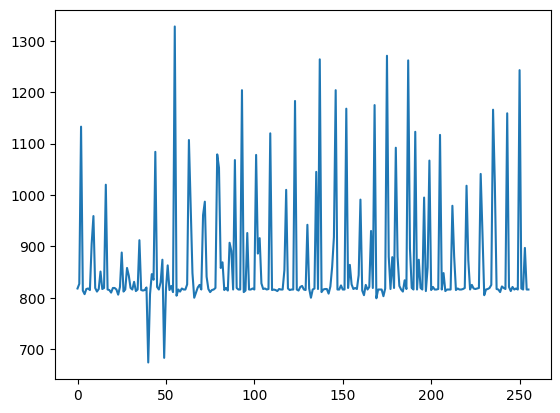

In [33]:
import matplotlib.pyplot as plt
plt.plot(array)

In [15]:
import numpy as np
from scipy.io.wavfile import write

# Sample rate (samples per second)
sample_rate = 62  

# Generate a NumPy array of audio data
duration = 4  # seconds

# Save the array as a WAV file
write("output.wav", sample_rate, np.array(array))

print("WAV file has been saved as output.wav")


WAV file has been saved as output.wav


In [26]:
temp = []

In [28]:
def leng(arr):
    if len(arr) == 260: return arr
    if len(arr) > 260 : return arr[:260]
    arr1 = [0 for i in range(0,260)]
    for i in range(len(arr)):
        arr1[i] += arr[i]

    return arr1
def parse(array):
    arr = np.array(leng(array))
    arr = (arr - arr.mean()) / arr.std()


    f = fftp.fft(arr)

    d = np.abs(f)
    temp.append(d[0:len(d)//2])

In [12]:
import pickle


In [18]:
len(temp)

12

In [19]:
with open("dist12.pkl",'wb') as f:
    pickle.dump(temp,f)

In [20]:
s = {len(i) for i in temp}

In [21]:
s

{130}

In [78]:
w1 = np.random.randn(130, 130) * np.sqrt(2.0 / 130)
b1 = np.zeros((130, 1))
w2 = np.random.randn(230, 130) * np.sqrt(2.0 / 130)
b2 = np.zeros((230, 1))
w3 = np.random.randn(70, 230) * np.sqrt(2.0 / 230)
b3 = np.zeros((70, 1))
w4 = np.random.randn(2, 70) * np.sqrt(2.0 / 70)
b4 = np.zeros((2, 1))

temp_data = None
dist_data = None

with open("teml12.pkl",'rb') as f:
    temp_data = pickle.load(f)

with open("dist12.pkl",'rb') as f:
    dist_data = pickle.load(f)


def forward(x : np.array):
    x = x.reshape((130,1))
    z1 = w1.dot(x) + b1
    h1 = np.tanh(z1)
    z2 = w2.dot(h1) + b2
    h2 = np.tanh(z2)
    z3 = w3.dot(h2) + b3
    h3 = np.tanh(z3)
    z4 = w4.dot(h3) + b4
    h4 = np.exp(z4) / np.sum(np.exp(z4))

    return h1,h2,h3,h4

def back(x,h1,h2,h3,h4,y, lr = 1e-4):
    global w1,w2,w3,w4,b1,b2,b3,b4
    x = x.reshape((130,1))
    error = h4 - y
    grad_w4 = error.dot(h3.T)
    grad_b4 = error
    grad_h3 = w4.T.dot(error)

    delta_3 = grad_h3 * (1 - h3**2)
    grad_w3 = delta_3.dot(h2.T)
    grad_b3 = delta_3
    grad_h2 = w3.T.dot(delta_3)

    delta_2 = grad_h2 * (1- h2**2)
    grad_w2 = delta_2.dot(h1.T)
    grad_b2 = delta_2
    grad_h1 = w2.T.dot(delta_2)

    delta_1 = grad_h1 * (1-h1**2)
    grad_w1 = delta_1.dot(x.T)
    grad_b1 = delta_1

    w1 -= lr*grad_w1
    b1 -= lr*grad_b1
    w2 -= lr*grad_w2
    b2 -= lr*grad_b2
    w3 -= lr*grad_w3
    b3 -= lr*grad_b3
    w4 -= lr*grad_w4
    b4 -= lr*grad_b4



In [53]:
temp_data = None
dist_data = None

with open("teml12.pkl",'rb') as f:
    temp_data = pickle.load(f)

with open("dist12.pkl",'rb') as f:
    dist_data = pickle.load(f)


{130}

In [43]:
import random

In [81]:
def train(epoch = 100, lr = 1e-4):
    data = []
    for i in temp_data:
        data.append((i,np.array([1,0]).reshape((2,1))))
    for i in dist_data:
        data.append((i,np.array([0,1]).reshape((2,1))))

    for i in range(epoch):
        random.shuffle(data)
        error = 0
        for j in data:
            x,y = j
            h1,h2,h3,h4 = forward(x)
            error += -np.sum(y*np.log(h4))
            back(x,h1,h2,h3,h4,y,lr)
        print(f"Error at epoch {i+1}: {error/len(data)}")

train(200,1e-5)

Error at epoch 1: 0.3287098961052792
Error at epoch 2: 0.3282142876767332
Error at epoch 3: 0.32772483503638034
Error at epoch 4: 0.3272414832123003
Error at epoch 5: 0.3267646701992514
Error at epoch 6: 0.32629379992727764
Error at epoch 7: 0.32582930952772704
Error at epoch 8: 0.3253708911327951
Error at epoch 9: 0.3249182229366491
Error at epoch 10: 0.3244713523274907
Error at epoch 11: 0.3240296406839491
Error at epoch 12: 0.3235935676803537
Error at epoch 13: 0.32316195504133743
Error at epoch 14: 0.32273529385665883
Error at epoch 15: 0.32231247384621337
Error at epoch 16: 0.3218938543869183
Error at epoch 17: 0.3214793711207297
Error at epoch 18: 0.3210675978589084
Error at epoch 19: 0.3206599608325051
Error at epoch 20: 0.3202545260500413
Error at epoch 21: 0.31985233382386047
Error at epoch 22: 0.31945228699841066
Error at epoch 23: 0.31905424623475026
Error at epoch 24: 0.3186588024403589
Error at epoch 25: 0.31826476429668854
Error at epoch 26: 0.3178725725279323
Error at ep

In [91]:
model = [w1,b1,w2,b2,w3,b3,w4,b4]

with open("model.pkl","wb") as f:
    pickle.dump(model,f)

In [92]:
with open("model.pkl","rb") as f:
    print(pickle.load(f))

[array([[-0.13005845, -0.08657868,  0.01369385, ...,  0.02714861,
         0.25415251, -0.15302871],
       [ 0.02354217, -0.03235057, -0.07916838, ...,  0.10800009,
         0.06549064,  0.18459624],
       [-0.17744192, -0.08350525,  0.02264826, ..., -0.08883185,
        -0.09298162, -0.03958519],
       ...,
       [-0.04826178, -0.07688507,  0.14983013, ..., -0.02209001,
        -0.05598693,  0.01505233],
       [ 0.09001449,  0.14781385, -0.072726  , ..., -0.08510966,
         0.13513914, -0.03358834],
       [-0.16206741, -0.20615793,  0.07975605, ..., -0.01303191,
        -0.00408903,  0.02662368]]), array([[-2.09228399e-04],
       [ 4.19742915e-05],
       [ 8.43381990e-06],
       [-2.47983898e-06],
       [-1.01468818e-08],
       [-3.78101677e-19],
       [-3.16566265e-06],
       [ 7.08986023e-06],
       [ 1.75882229e-06],
       [ 1.13672625e-04],
       [ 0.00000000e+00],
       [-6.75119178e-05],
       [ 5.06416888e-05],
       [ 2.39907783e-06],
       [-1.81254560e-